QUESTION 2

The datasets provided are a collection of Abalone traits used to age various species using the target
variable ‘Rings’. There are two datasets provided, one of which is the training data and the other the
testing data.
Use the datasets to investigate the following research objectives;
1. To generate a data mining model suitable for predicting the age of Abalone species. [20 MARKS]
2. To predict the age of the Abalone species in the testing dataset (i.e. Question 2_test.csv).
[20 MARKS ]

In [15]:
# import dataset
import pandas as pd #import and transform-data import seaborn as sn #Generates visuals
import seaborn as sn
import numpy as np #structuring data
import matplotlib as mat #Generates visuals
data_train = pd.read_csv('Question 2_train.csv')
data_test = pd.read_csv('Question 2_test.csv')

In [16]:
from sklearn.metrics import r2_score

In [17]:
data_train

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [18]:
data_train.nunique()


id                90615
Sex                   3
Length              157
Diameter            126
Height               90
Whole weight       3175
Whole weight.1     1799
Whole weight.2      979
Shell weight       1129
Rings                28
dtype: int64

In [19]:
data_train.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Sex' column in both training and testing datasets
data_train['Sex'] = le.fit_transform(data_train['Sex'])

data_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [21]:
data_train=data_train[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']]

In [22]:
# Identify categorical and continuous variables
categorical_vars = data_train.select_dtypes(include=['object']).columns.tolist()
continuous_vars = data_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: []
Continuous Variables: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']


In [23]:
#Use ANOVA
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
#Calling the function to check which continuous variables are correlated with target
ContinuousVariables=['Rings']
FunctionAnova(inpData=data_train, TargetVariable='Sex', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Rings is correlated with Sex | P-Value: 0.0


['Rings']

In [25]:
# Perform ANOVA to check if 'Sex' is correlated with 'Rings'
anova_results = FunctionAnova(inpData=data_train, TargetVariable='Rings', ContinuousPredictorList=['Sex'])
print(anova_results)

##### ANOVA Results ##### 

Sex is correlated with Rings | P-Value: 3.7786072662035845e-25
['Sex']


In [26]:
data_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [27]:
data_train

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [28]:
# Calculate the correlation matrix for continuous variables
correlation_matrix = data_train[continuous_vars].corr()

# Display the correlation matrix
print(correlation_matrix)

                  Length  Diameter    Height  Whole weight  Whole weight.1  \
Length          1.000000  0.989732  0.916094      0.931449        0.909609   
Diameter        0.989732  1.000000  0.919618      0.933848        0.908466   
Height          0.916094  0.919618  1.000000      0.902344        0.861769   
Whole weight    0.931449  0.933848  0.902344      1.000000        0.971249   
Whole weight.1  0.909609  0.908466  0.861769      0.971249        1.000000   
Whole weight.2  0.913134  0.914668  0.886132      0.974319        0.949227   
Shell weight    0.911073  0.917871  0.904019      0.964201        0.911800   
Rings           0.623786  0.636832  0.665772      0.617274        0.515067   

                Whole weight.2  Shell weight     Rings  
Length                0.913134      0.911073  0.623786  
Diameter              0.914668      0.917871  0.636832  
Height                0.886132      0.904019  0.665772  
Whole weight          0.974319      0.964201  0.617274  
Whole weight

In [29]:
SelectedColumns= ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Selecting final columns
DataForML=data_train[SelectedColumns]
DataForML.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [30]:
#Or use one-hot encoding
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975
...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700


In [31]:
# Adding Target Variable to the data
DataForML_Numeric['Rings']=data_train['Rings']

# Printing sample rows
DataForML_Numeric.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [32]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rings'
Predictors=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [33]:
# Split the data into training and testing set
#Training the model on 70% of the data and testing it on 30% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [34]:
# Sanity check for the sampled data (how the split has occured)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63430, 8)
(63430,)
(27185, 8)
(27185,)


Using decision tree to test tne model-- use regressor , not classifier

Mean Absolute Error: 1.6714054586728668
Mean Squared Error: 5.425273673059057
Root Mean Squared Error: 2.3292216882596333
R2 Score: 0.4516733428483344

Accuracy values for 10-fold Cross Validation:
 [0.45074932 0.45341924 0.44277895 0.44711175 0.45641195 0.45165929
 0.45971292 0.44887121 0.45335772 0.45315176]

Final Average Accuracy of the model: 0.45


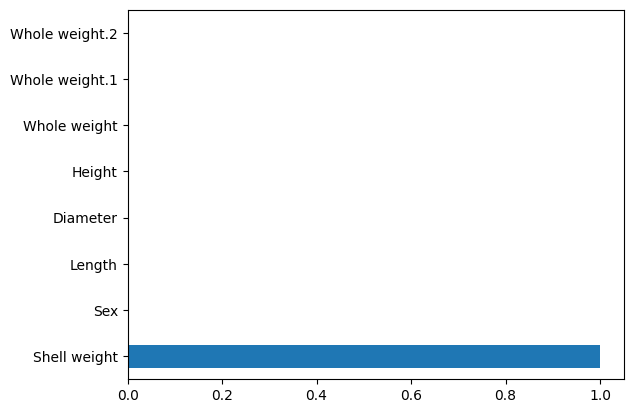

In [39]:
# Decision Trees
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Choose from different tunable hyperparameters
clf = tree.DecisionTreeRegressor(max_depth=2, criterion='squared_error')

# Creating the model on Training Data
DTree = clf.fit(X_train, y_train)
prediction = DTree.predict(X_test)

# Measuring accuracy on Testing Data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 Score:', metrics.r2_score(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(DTree, X, y, cv=10, scoring='r2')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


In [36]:
#clf.fit(X_train, y_train)

In [37]:
#y_pred = clf.predict(X_test)

In [38]:
#score = r2_score(y_test, y_pred)
#score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Decision Tree Regressor')
plt.show()

# Calculate and print regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

In [46]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error


rf_model = RandomForestRegressor(max_depth=5,random_state=1)

# Fit the Random Forest on the training data
rf_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# R-squared score
r_squared_rf_train = rf_model.score(X_train, y_train)
print(f'R-squared score on train data (Random Forest): {r_squared_rf_train:.4f}')
r_squared_rf = rf_model.score(X_test, y_test)
print(f'R-squared score on test data (Random Forest): {r_squared_rf:.4f}')

# Median Absolute Error
median_error_train_rf = median_absolute_error(y_train, y_train_pred_rf)
median_error_test_rf = median_absolute_error(y_test, y_test_pred_rf)
print(f'Median Absolute Error on train data (Random Forest): {median_error_train_rf:.4f}')
print(f'Median Absolute Error on test data (Random Forest): {median_error_test_rf:.4f}')

R-squared score on train data (Random Forest): 0.6208
R-squared score on test data (Random Forest): 0.6168
Median Absolute Error on train data (Random Forest): 0.9451
Median Absolute Error on test data (Random Forest): 0.9210


In [47]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5,random_state=1)

# Fit the Decision Tree on the training data
dt_model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# R-squared score
r_squared_dt_train = dt_model.score(X_train, y_train)
print(f'R-squared score on train data (Decision Tree): {r_squared_dt_train:.4f}')
r_squared_dt = dt_model.score(X_test, y_test)
print(f'R-squared score on test data (Decision Tree): {r_squared_dt:.4f}')

# Median Absolute Error
median_error_train_dt = median_absolute_error(y_train, y_train_pred_dt)
median_error_test_dt = median_absolute_error(y_test, y_test_pred_dt)
print(f'Median Absolute Error on train data (Decision Tree): {median_error_train_dt:.4f}')
print(f'Median Absolute Error on test data (Decision Tree): {median_error_test_dt:.4f}')

R-squared score on train data (Decision Tree): 0.5930
R-squared score on test data (Decision Tree): 0.5913
Median Absolute Error on train data (Decision Tree): 0.9135
Median Absolute Error on test data (Decision Tree): 0.9135


In [51]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression


model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-squared score
r_squared = model.score(X_train, y_train)
print(f'R-squared score on train data: {r_squared:.4f}')
r_squared = model.score(X_test, y_test)
print(f'R-squared score on test data: {r_squared:.4f}')

# Median Absolute Error
median_error_train = median_absolute_error(y_train, y_train_pred)
median_error_test = median_absolute_error(y_test, y_test_pred)
print(f'Median Absolute Error on train data: {median_error_train:.4f}')
print(f'Median Absolute Error on test data: {median_error_test:.4f}')

R-squared score on train data: 0.5986
R-squared score on test data: 0.6011
Median Absolute Error on train data: 0.9777
Median Absolute Error on test data: 0.9818


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# # 1. Load your data
# # Assuming your data is in a pandas DataFrame called 'df' with features and a target variable
# # Replace 'target_variable' with the name of your target column
# X = df.drop('target_variable', axis=1)  
# y = df['target_variable']

# # 2. Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# 3. Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  

# 4. Train the model 
rf_regressor.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.4503966709582494
R-squared: 0.651272067282277


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.638694794996314
R-squared: 0.6322409755579208


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Select features and target variable
features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
target = 'Rings'

X_train = data_train[features]
y_train = data_train[target]


# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2 Score:", r2_score(y_test, y_pred))

c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
249 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 1.840327873976514


c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Test RMSE: 1.3652162289237146
Test R2 Score: 0.8116261588001106


In [71]:
import joblib
# Save the best model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [1]:
import joblib
import pandas as pd

# 1. Load the model
with open('best_random_forest_model.pkl', 'rb') as file:
    loaded_model = joblib.load(file)

# 2. Load and prepare new data
data_test = pd.read_csv('Question 2_test.csv') 
# ... (preprocessing if needed) ...



In [2]:
data_test = data_test.drop(columns=['id'])
data_test

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Sex' column in both training and testing datasets
data_test['Sex'] = le.fit_transform(data_test['Sex'])

data_test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [4]:
# 3. Make predictions
predictions = loaded_model.predict(data_test)

# Output 1: The 'predictions' variable (typically a NumPy array or a pandas Series)
print("Predictions output:")
print(predictions)


# Output 2: The 'data_test' DataFrame after adding the predictions as a column
data_test['predicted_rings'] = predictions

data_test

Predictions output:
[10.20670885  9.84611689  9.93403678 ... 11.74117122 13.17418753
  8.92291922]


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,predicted_rings
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,10.206709
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.846117
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.934037
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,10.736228
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,7.740296
...,...,...,...,...,...,...,...,...,...
60406,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,6.278436
60407,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,9.185394
60408,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,11.741171
60409,0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,13.174188


In [ ]:
data_test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,predicted_rings
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,10.206709
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,9.846117
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,9.934037
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,10.736228
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,7.740296


In [ ]:
import numpy as np 


# Round the predictions to the nearest whole number
rounded_predictions = np.round(predictions)

data_test['predicted_rings_rounded'] = rounded_predictions
print(data_test)

       Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0        2   0.645     0.475   0.155        1.2380          0.6185   
1        2   0.580     0.460   0.160        0.9830          0.4785   
2        2   0.560     0.420   0.140        0.8395          0.3525   
3        2   0.570     0.490   0.145        0.8740          0.3525   
4        1   0.415     0.325   0.110        0.3580          0.1575   
...    ...     ...       ...     ...           ...             ...   
60406    1   0.345     0.260   0.085        0.1775          0.0735   
60407    0   0.525     0.410   0.145        0.8445          0.3885   
60408    1   0.590     0.440   0.155        1.1220          0.3930   
60409    0   0.660     0.525   0.190        1.4935          0.5885   
60410    0   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  predicted_rings  predicted_rings_rounded  
0              0.3125        0.3005        10.206709                     10.0  